# **Model Training**

## Importing Required Packages

In [1]:
# basic import
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# modelling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Importing CSV data as Pandas DataFrame

In [13]:
df = pd.read_csv('data/raw.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Transforming features

In [14]:
# splitting into X & y
X = df.drop('math score', axis=1)
y = df[['math score']]

In [15]:
# defining numerical & categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [7]:
# importing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

## Train Test Split

In [19]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r_squared = r2_score(true, predicted)
    return mae, rmse, r_squared

In [37]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model = model
    # Training model
    model.fit(X_train, y_train)

    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating the model
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name) 
    r2_list.append(test_r2)

    print("Model Performance for Training set :")
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(train_mae)) 
    print("- R2 Score: {:.4f}".format(train_r2))

    print('_________________________________________________________________') 

    print("Model Performance for Testing set :")
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(test_mae)) 
    print("- R2 Score: {:.4f}".format(test_r2))

    print('='*35)
    print('\n')

LinearRegression
Model Performance for Training set :
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
_________________________________________________________________
Model Performance for Testing set :
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model Performance for Training set :
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
_________________________________________________________________
Model Performance for Testing set :
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training set :
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
_________________________________________________________________
Model Performance for Testing set :
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Traini

## Detail Result

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,LinearRegression,0.880345
5,RandomForestRegressor,0.851744
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.848750
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,DecisionTreeRegressor,0.757231


## Linear Regression

In [39]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


Plotting y_pred and y_test

In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted')

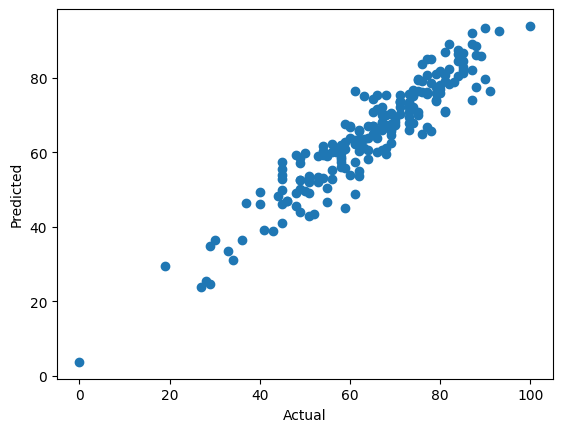

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

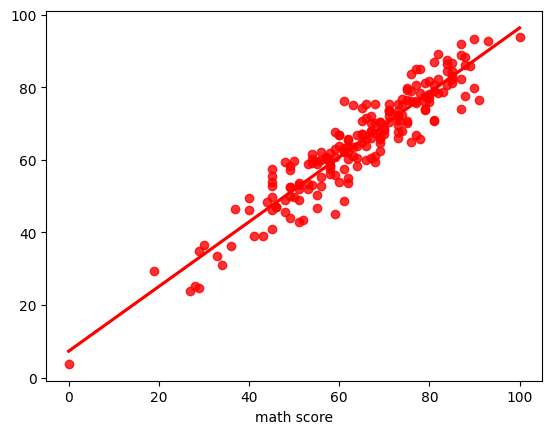

In [32]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

Difference between Actual and Predicted Values

In [58]:
data_dict = {
    'Actual': y_test.values.ravel(),
    "Predicted": y_pred.ravel(),
    "Difference": (y_test - y_pred).values.ravel()
}
pd.DataFrame(data_dict)

,Actual,Predicted,Difference
0,91,76.507812,14.492188
1,53,58.953125,-5.953125
2,80,76.960938,3.039062
3,74,76.757812,-2.757812
4,84,87.539062,-3.539062
...,...,...,...
195,52,43.546875,8.453125
196,62,62.031250,-0.031250
197,74,67.976562,6.023438
198,65,67.132812,-2.132812
